In [ ]:
import os
import glob
import natsort
import xarray as xr

In [10]:
version = "V4"
TRAIN_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{version}/train/target"
VAL_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{version}/val/target"
TEST_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{version}/test/target"

In [13]:
zarr_path = natsort.natsorted(glob.glob(os.path.join(TRAIN_DIR, "*.zarr"), recursive=False))

In [16]:
dt = xr.open_datatree(zarr_path[10], engine="zarr", mask_and_scale=False, chunks={})
ds = dt.measurements.reflectance.r10m


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0999..1.7816].


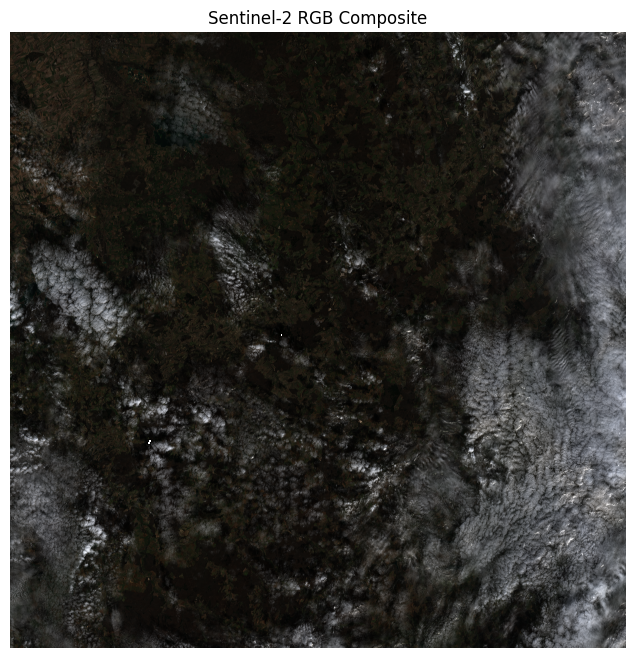

In [17]:
import matplotlib.pyplot as plt
import numpy as np

rgb = np.dstack([
    ds['b04'].values,
    ds['b03'].values,
    ds['b02'].values
])
# Plot
plt.figure(figsize=(12, 8))
plt.imshow(rgb)
plt.axis('off')
plt.title('Sentinel-2 RGB Composite')
plt.show()

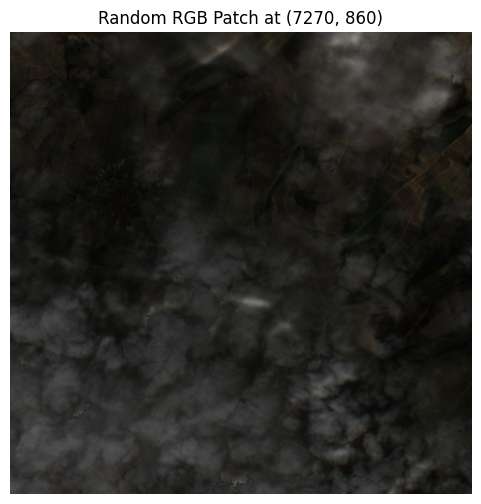

In [28]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load Zarr dataset (already done in your code)
dt = xr.open_datatree(zarr_path[10], engine="zarr", mask_and_scale=False, chunks={})
ds = dt.measurements.reflectance.r10m

# Construct RGB composite
rgb = np.dstack([
    ds['b04'].values,  # Red
    ds['b03'].values,  # Green
    ds['b02'].values   # Blue
])

# Set patch size
patch_height = 512
patch_width = 512

# Set random seed
np.random.seed(42)

# Compute valid bounds
max_y = rgb.shape[0] - patch_height
max_x = rgb.shape[1] - patch_width

# Sample top-left corner of the patch
y = np.random.randint(0, max_y)
x = np.random.randint(0, max_x)

# Extract patch
patch = rgb[y:y+patch_height, x:x+patch_width, :]

# Plot the patch
plt.figure(figsize=(6, 6))
plt.imshow(patch)
plt.axis('off')
plt.title(f"Random RGB Patch at ({y}, {x})")
plt.show()

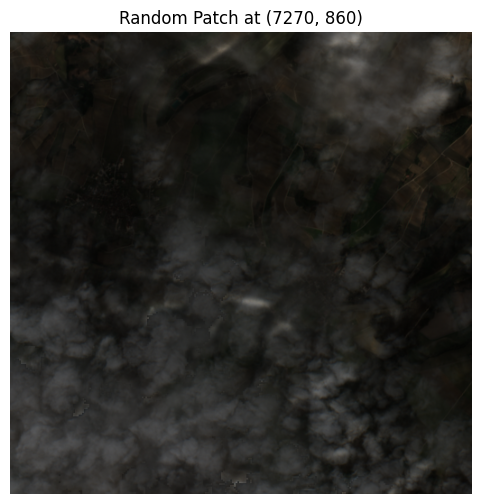

In [29]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load Zarr dataset (already done in your code)
dt = xr.open_datatree(zarr_path[10], engine="zarr", mask_and_scale=False, chunks={})
ds = dt.measurements.reflectance.r10m

# Construct RGB composite
rgb = np.dstack([
    ds['b04'].values,  # Red
    ds['b03'].values,  # Green
    ds['b02'].values   # Blue
])

# Set patch size
patch_height = 512
patch_width = 512

# Set random seed
np.random.seed(42)

# Compute valid bounds
max_y = rgb.shape[0] - patch_height
max_x = rgb.shape[1] - patch_width

# Sample top-left corner of the patch
y = np.random.randint(0, max_y)
x = np.random.randint(0, max_x)

# Extract patch
patch = rgb[y:y+patch_height, x:x+patch_width, :]

# Plot the patch
plt.figure(figsize=(6, 6))
plt.imshow(patch)
plt.axis('off')
plt.title(f"Random Patch at ({y}, {x})")
plt.show()

In [52]:
ds.b02

<xarray.DataArray 'b02' (y_10m: 10980, x_10m: 10980)> Size: 964MB
dask.array<open_dataset-b02, shape=(10980, 10980), dtype=float64, chunksize=(1830, 1830), chunktype=numpy.ndarray>
Coordinates:
    x        (x_10m) float32 44kB dask.array<chunksize=(1830,), meta=np.ndarray>
    y        (y_10m) float32 44kB dask.array<chunksize=(1830,), meta=np.ndarray>
Dimensions without coordinates: y_10m, x_10m
Attributes:
    _eopf_attrs:  {'add_offset': -0.1, 'coordinates': ['y', 'x'], 'dimensions...
    dtype:        <u2
    long_name:    BOA reflectance from MSI acquisition at spectral band 02 49...
    units:        digital_counts
    _FillValue:   0.0

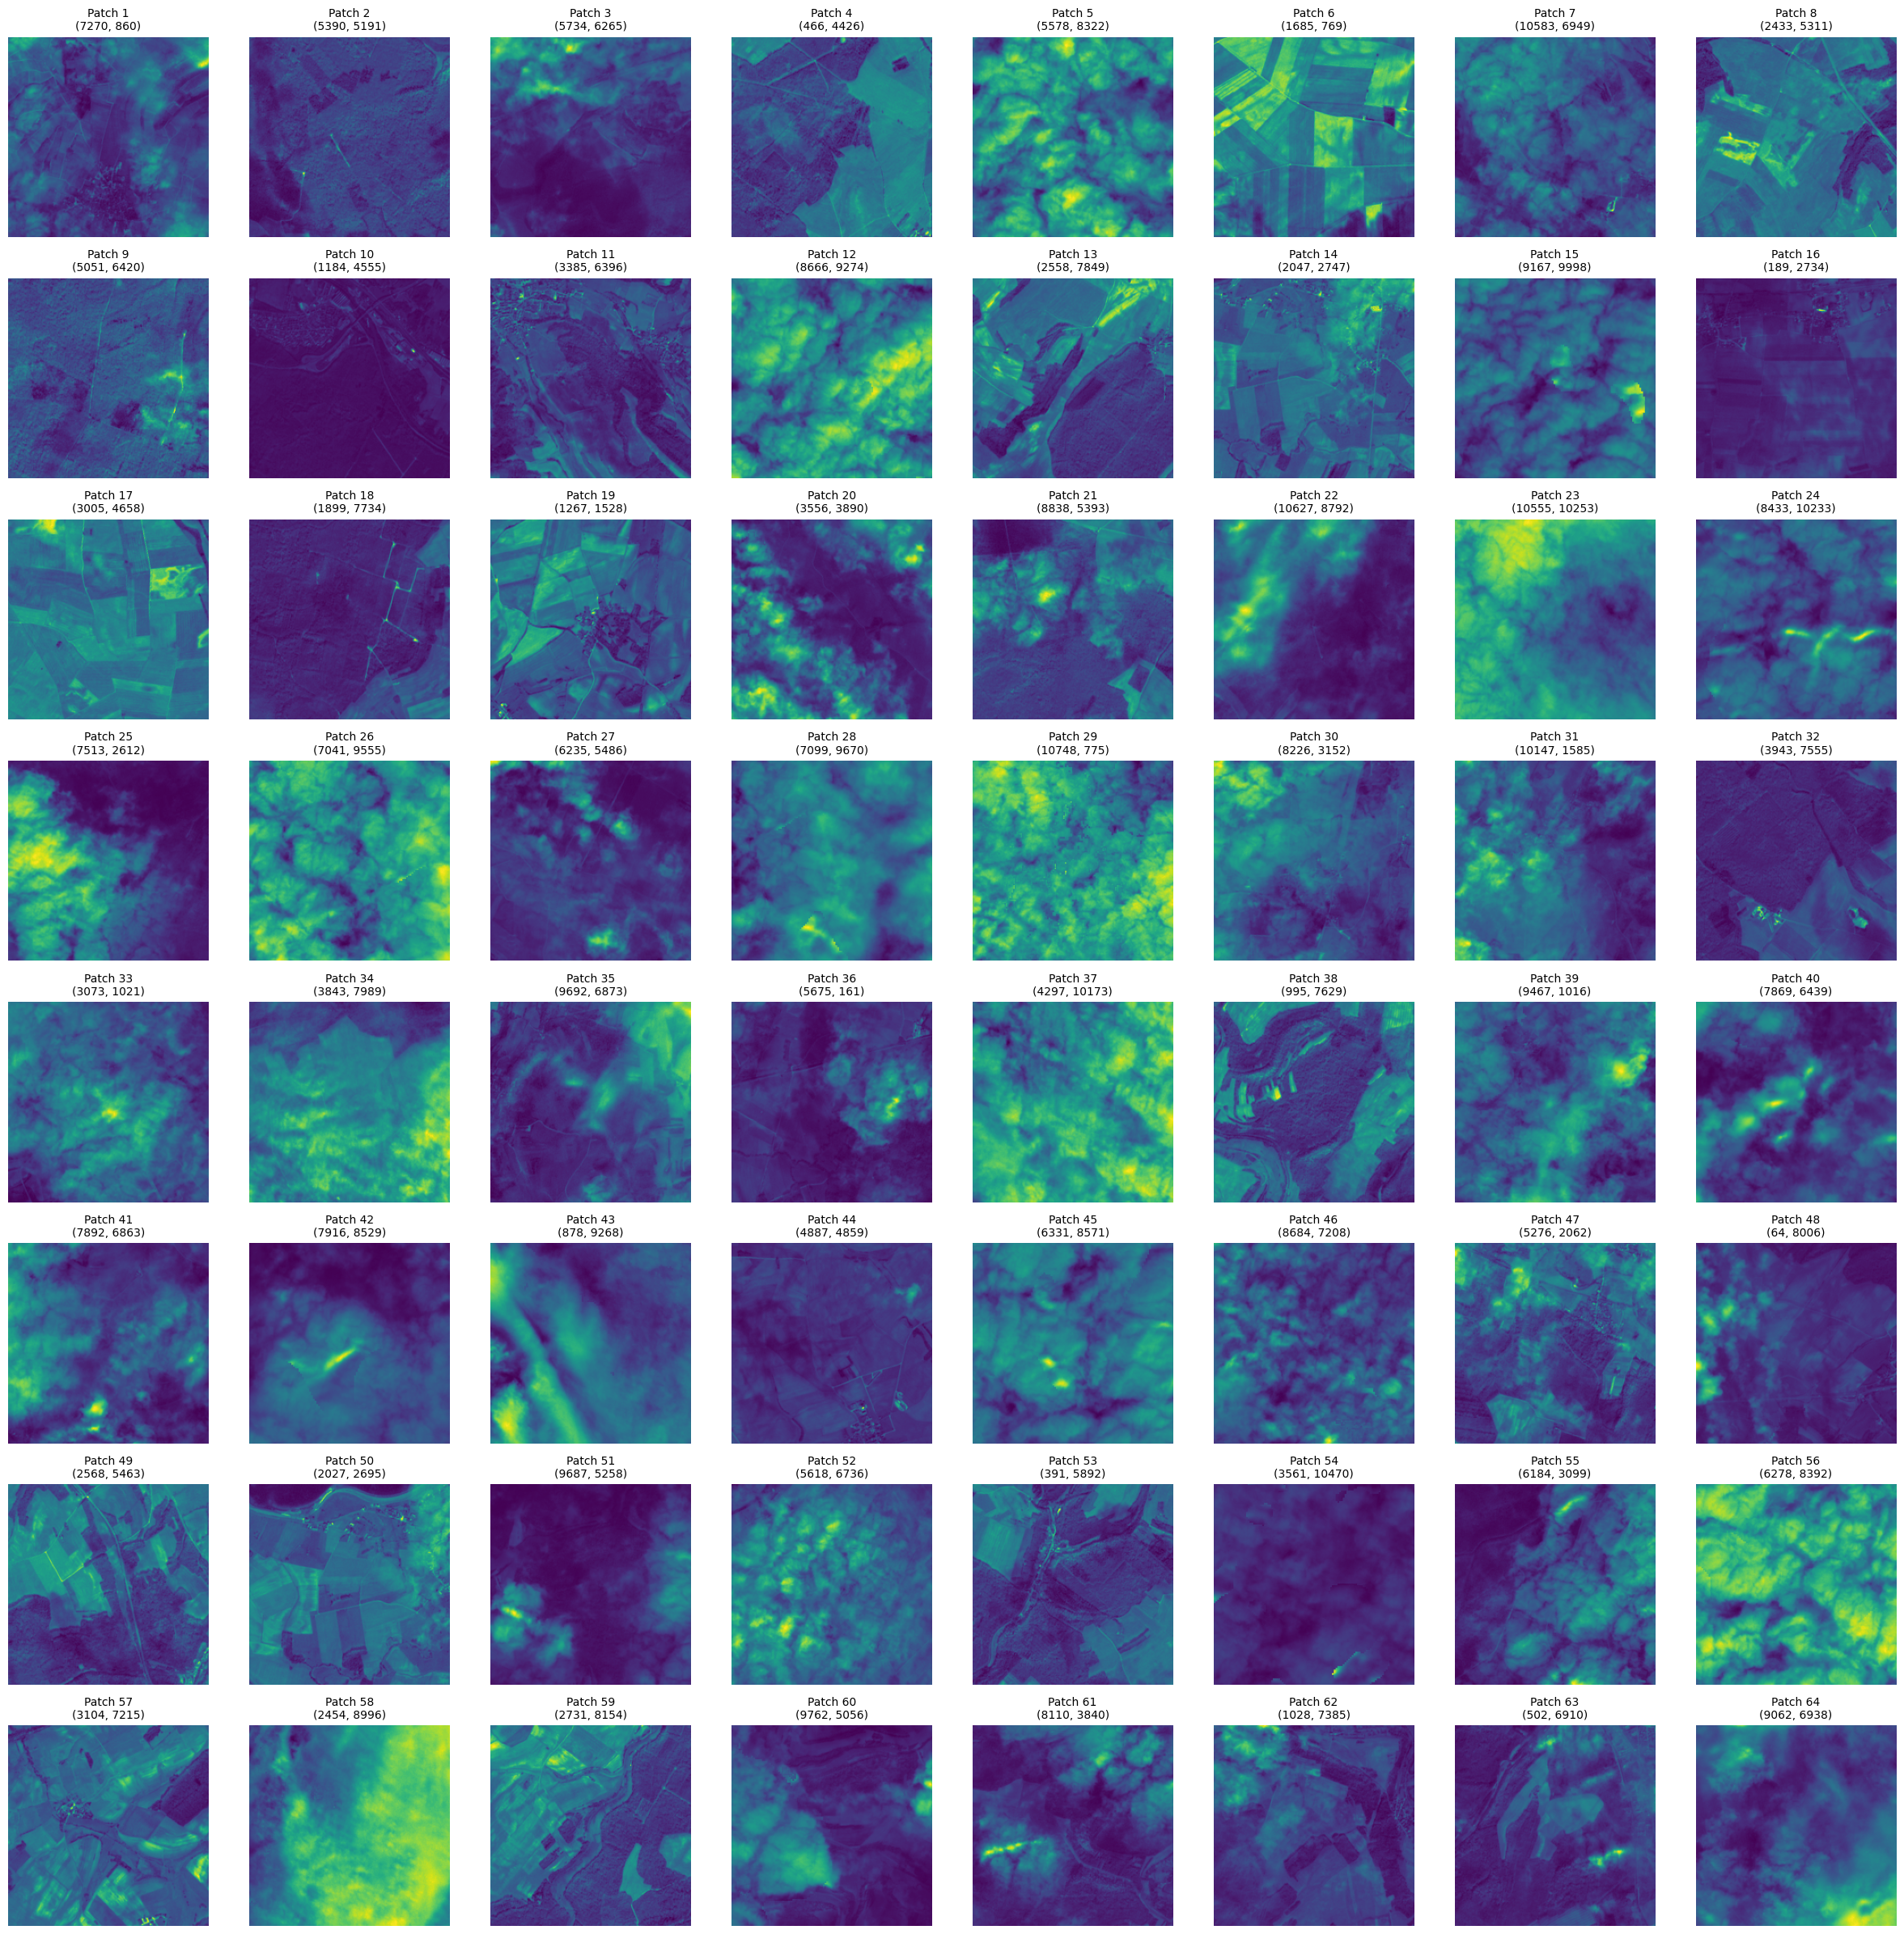

In [51]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
dt = xr.open_datatree(zarr_path[10], engine="zarr", mask_and_scale=False, chunks={})
ds = dt.measurements.reflectance.r10m

# Build RGB
rgb = np.dstack([
    # ds['b04'].values,
    ds['b03'].values,
    # ds['b02'].values
])

# Patch config
patch_height = 224
patch_width = 224
num_patches = 64
np.random.seed(42)

max_y = rgb.shape[0] - patch_height
max_x = rgb.shape[1] - patch_width

patches = []
positions = []

for _ in range(num_patches):
    y = np.random.randint(0, max_y)
    x = np.random.randint(0, max_x)
    patch = rgb[y:y+patch_height, x:x+patch_width, :]
    patches.append(patch)
    positions.append((y, x))

# Create subplot grid
rows, cols = 8, 8
fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

for idx, ax in enumerate(axes.flat):
    ax.imshow(patches[idx],cmap="viridis")
    ax.set_title(f"Patch {idx+1}\n({positions[idx][0]}, {positions[idx][1]})", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# L1C geocoded info